<a href="https://colab.research.google.com/github/Mehaboob999/notebook-rough/blob/main/01_eda_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/content/Sales_data(EDA Exported).csv')
df.head()


,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,...,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num,order_month
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6.0,2499.1,14994.6,1824.343,GA,...,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1.0,2014-01
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11.0,2351.7,25868.7,1269.918,IN,...,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1.0,2014-01
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6.0,978.2,5869.2,684.740,CA,...,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1.0,2014-01
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7.0,2338.3,16368.1,1028.852,IN,...,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1.0,2014-01
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8.0,2291.4,18331.2,1260.270,CT,...,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1.0,2014-01


In [4]:
print(df.info())
print(df.isnull().sum())
df = df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59641 entries, 0 to 59640
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_number       59641 non-null  object 
 1   order_date         59641 non-null  object 
 2   customer_name      59641 non-null  object 
 3   channel            59640 non-null  object 
 4   product_name       59640 non-null  object 
 5   quantity           59640 non-null  float64
 6   unit_price         59640 non-null  float64
 7   revenue            59640 non-null  float64
 8   cost               59640 non-null  float64
 9   state              59640 non-null  object 
 10  state_name         59640 non-null  object 
 11  us_region          59640 non-null  object 
 12  lat                59640 non-null  float64
 13  lon                59640 non-null  float64
 14  budget             13277 non-null  float64
 15  total_cost         59640 non-null  float64
 16  profit             596

In [11]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [31]:
df['Month'] = df['order_date'].dt.month
df['Year'] = df['order_date'].dt.year

Text(0, 0.5, 'Total Sales')

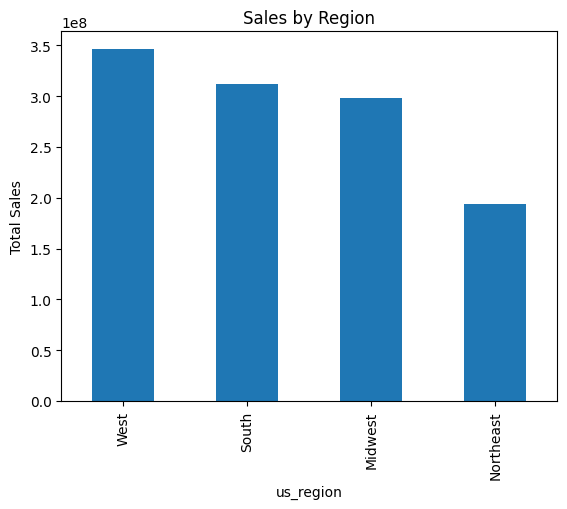

In [32]:
region_sales = df.groupby('us_region')['revenue'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', title='Sales by Region')
plt.ylabel('Total Sales')

Text(0, 0.5, 'Sales')

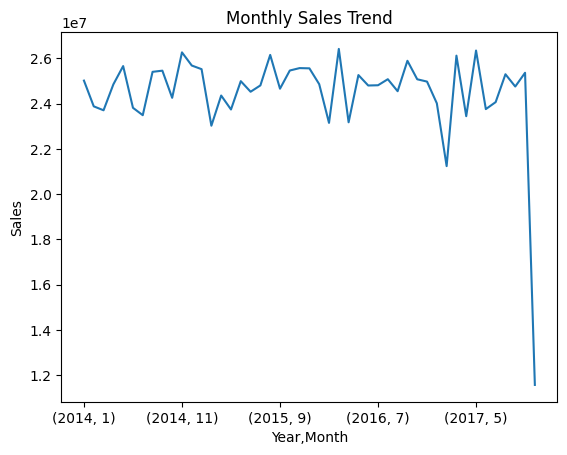

In [33]:
monthly_sales = df.groupby(['Year', 'Month'])['revenue'].sum()
monthly_sales.plot(title='Monthly Sales Trend')
plt.ylabel('Sales')

<Axes: title={'center': 'Top 10 Selling Products'}, xlabel='product_name'>

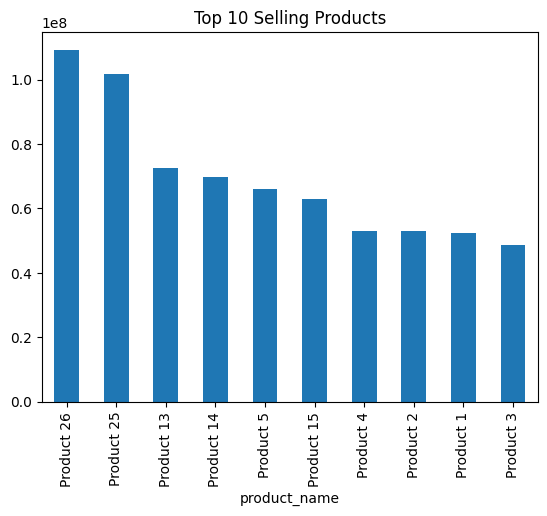

In [34]:
top_products = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Selling Products')

In [36]:
import os

# Create the directory if it doesn't exist
os.makedirs('../data', exist_ok=True)

df.to_csv('../data/cleaned_sales.csv', index=False)